### 등식 제한조건이 있는 최적화 문제

- 등식(equality) 제한조건
$$ x^* = \arg\min_xf(x) $$
$$ x \in R^N$$
$$ g_j(x) = 0 (j= 1,\dots,M)$$

- 예) 목적함수 f와 제한조건 g
$$원을 그리는 함수\;:\; f(x_1, x_2) = x_1^2 + x_2^2 $$ 
$$직선 함수\;:\; g(x_1, x_2) = x_1 + x_2 - 1 = 0$$ 

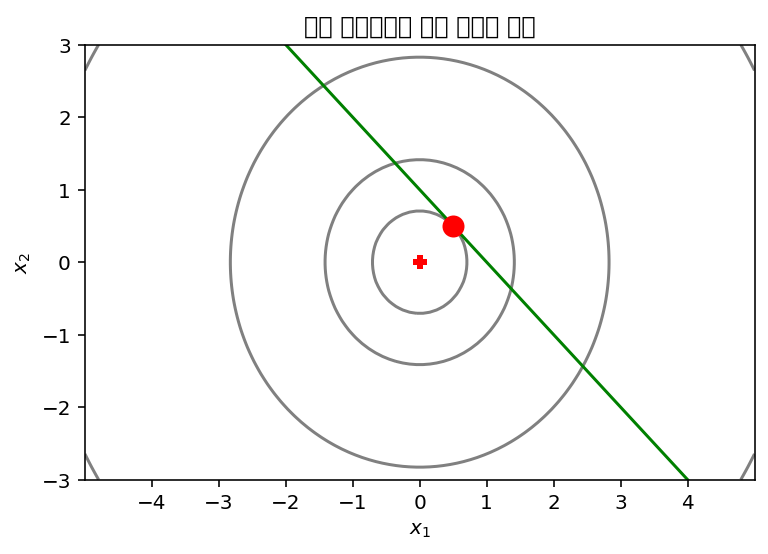

In [1]:
# 목적함수 f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# 등식 제한조건 방정식 g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("등식 제한조건이 있는 최적화 문제")
plt.show()

## 랑그랑주 승수법
- 이렇게 등식 제한조건이 있는 최적화 문제를 랑그랑주 승수법을 사용하여 최적화할 수 있다
$$ f(x) + \sum_{j=1}^M\lambda_jg_j = h(x,\lambda)$$

- 여기서 $h(x,\lambda)$를 목적함수로 간주하여 최적화 한다

예) 새로운 목적 함수
$$ h(x_1,x_2,\lambda) = f(x_1, x_2) + \lambda g(x_1, x_2) = x^2_1 + x^2_2 + \lambda(x_1 + x_2 - 1)$$
- 랑그랑주 승수법을 적용하여 그레디언트 벡터가 0인 위치를 구한다
$$ \frac{\partial}{\partial x_1}h = 2x_1 + \lambda = 0$$
$$ \frac{\partial}{\partial x_2}h = 2x_2 + \lambda = 0$$
$$ \frac{\partial}{\partial \lambda}h = x_1 + x_2 + 1 = 0$$
- 따라서 
$$ x_1 = x_2 = \frac{1}{2}, \;\lambda = -1 $$

- 랑그랑주 승수의 의미
    - 만약 최적화 문제에서 등식 제한조건이 $g_i$이 있는가 없는가에 따라 해의 값이 달라진다면 이 등식 제한조겐에 대응하는 랑그랑주 승수 $\lambda_i$는 0이 아는 값이여야 한다.
    - $\lambda_i = 0$일 때만 원래의 문제와 제한조건이 있는 문제의 최적화 조건이 같아지므로 최적화 해의 위치도 같게 나오기 때문이다
    - 제한조건이 있으나 없으나 결과가 같으면 랑그랑주 승수$\lambda = 0$이다

***
# 부등식 제한조건이 있는 최적화 문제

- 부등식(inequality)제헌조건이 있는 최적화 문제
$$ x^* = \arg\min_xf(x) $$
$$ x \in R^N$$
$$ g_j(x) \leq 0 (j= 1,\dots,M)$$
- 만약 $g_j \geq 0$일경우 -1을 곱하여 부호의 방향을 바꾼다
- 이후 랑그랑주 승수 방법과 목적함수를 바꾸어 준다
$$ h(x, \lambda) = f(x) + \sum_{j=1}^M\lambda_jg_j(x) $$

### KKT
- 이때 필요 조건이 방정식 제한조건이 있는 최적화 문제와 다르게 KKT(Karush-Kuhn-Tucker)조건이라고 하며 다음처럼 3개의 조건으로 이루어진다.
    1. 모든 독립변수 $x_N$에 대한 미분값이 0 이다($\lambda$일때 0일 필요가 없다)
    $$ \frac{\partial}{\partial x_i}h(x, \lambda) = 0$$
    2. 모든 랑그랑주 승수 $\lambda_M$과 제한조건 부등식($\lambda$에 대한 미분값)의 곱이 0 이다
    $$ \lambda_j \cdot\frac{\partial}{\partial \lambda}h(x, \lambda) = \lambda_j\cdot g_j = 0 $$
    3. 랑그랑주 승수는 음수가 아니여야 한다
    $$ \lambda_j \geq 0 $$

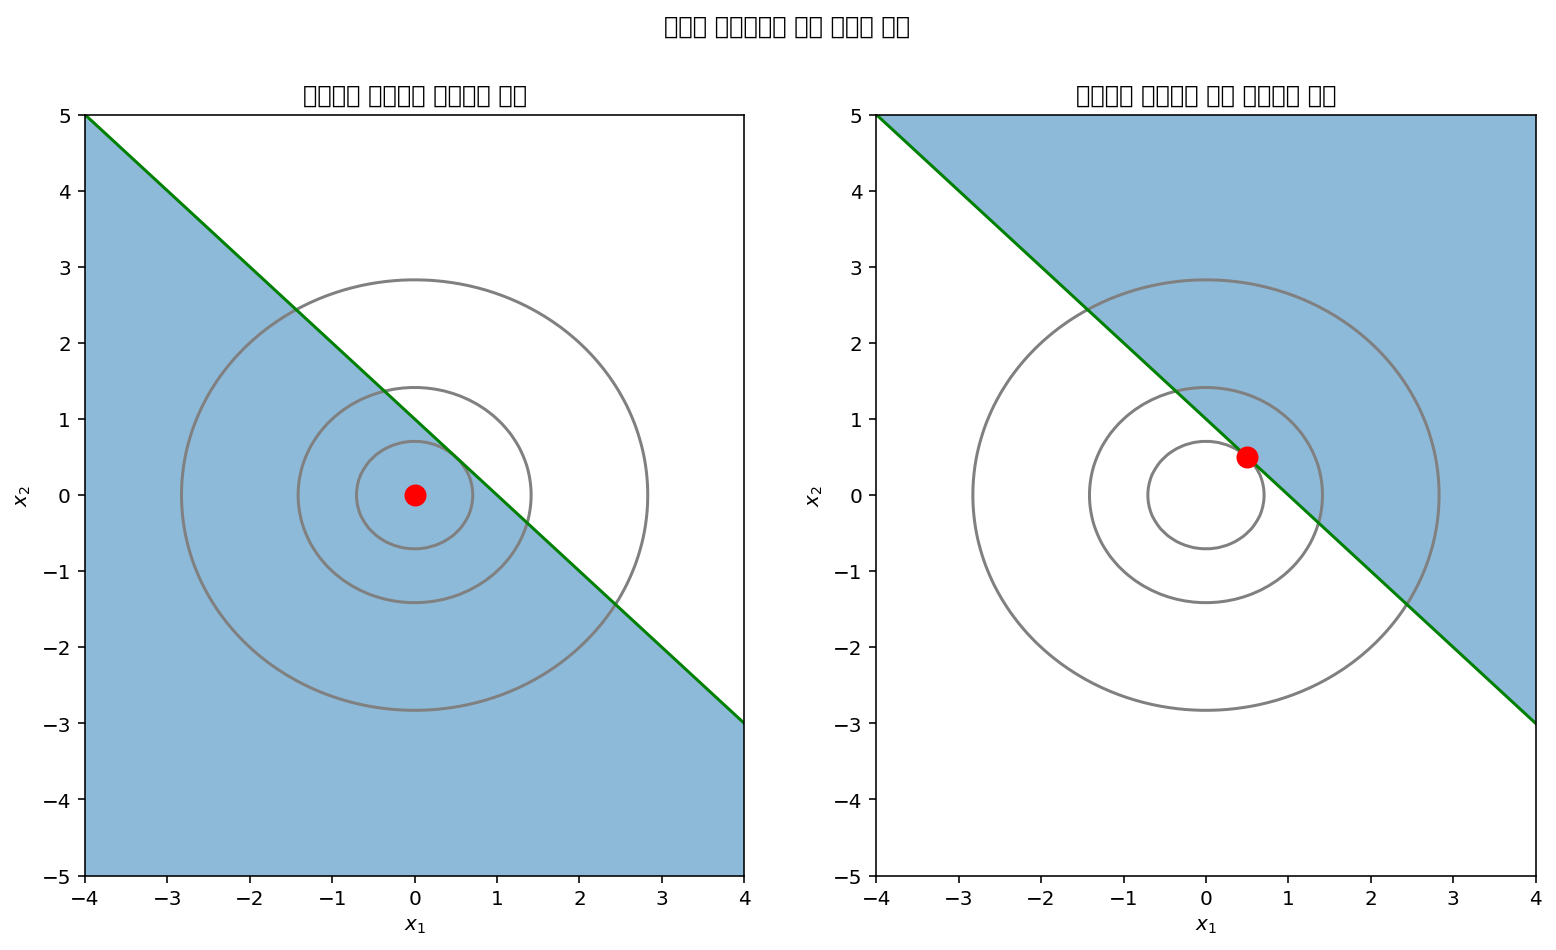

In [2]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식과 관계없는 경우")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식에 의해 결정되는 경우")
plt.suptitle("부등식 제한조건이 있는 최적화 문제")
plt.show()